In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn

In [9]:
df = pd.read_csv("/Users/trish/Downloads/netflix.csv")
closed_prices = df["Close"]

In [10]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4876,05-10-2021,640.390015,606.890015,606.940002,634.809998,9534300,634.809998
4877,06-10-2021,639.869995,626.359985,628.179993,639.099976,4580400,639.099976
4878,07-10-2021,646.840027,630.450012,642.229981,631.849976,3556900,631.849976
4879,08-10-2021,643.799988,630.859985,634.169983,632.659973,3271100,632.659973


In [11]:
seq_len = 15

In [12]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [13]:

X=[]
Y=[]

In [14]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [15]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [16]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [17]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [18]:
model = Model(1,64)

In [19]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
loss_fn = nn.MSELoss()

In [21]:
num_epochs=100

In [22]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.00600067
20 epoch loss 0.0049300278
30 epoch loss 0.004744564
40 epoch loss 0.0043800604
50 epoch loss 0.003928592
60 epoch loss 0.0032170506
70 epoch loss 0.0015313838
80 epoch loss 0.00056310004
90 epoch loss 0.0002010084


In [23]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [24]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())


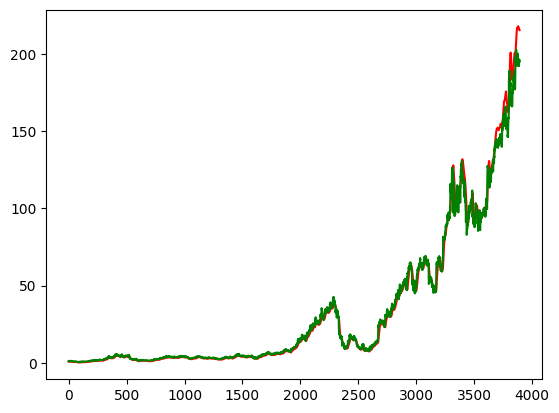

In [25]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()